In [ ]:
%pip install snntorch

# Loading del dataset FashionMNIST

In [16]:
import torch
import torchvision
from torchvision import datasets

# definizione della cartella in cui scaricare i dati
data_root = "../data"

# definizione del train dataset FashionMNIST e delle trasformazioni da applicare
# fmnist_trainset = datasets.FashionMNIST(root=data_root, train=True, download=True, transform=None)
# definizione del test dataset FashionMNIST e delle trasformazioni da applicare
transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((28,28)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.,),(1.,))
])
fmnist_testset = datasets.FashionMNIST(root=data_root, train=False, download=True, transform=transform)

In [17]:
target_label = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Codifica Rate Coding
La codifica delle prime dieci immagini viene fatta con il metodo rate di snnTorch

In [18]:
import ipywidgets as widgets
from snntorch import spikegen
from matplotlib import pyplot as plt
from snntorch import spikeplot as splt
from IPython.display import HTML
from torch.utils.data import DataLoader

In [19]:
fmnist_test_loader = DataLoader(fmnist_testset, 10)
dataset, target = next(iter(fmnist_test_loader))

Ankle boot


Pullover


Trouser


Trouser


Shirt


Trouser


Coat


Shirt


Sandal


Sneaker


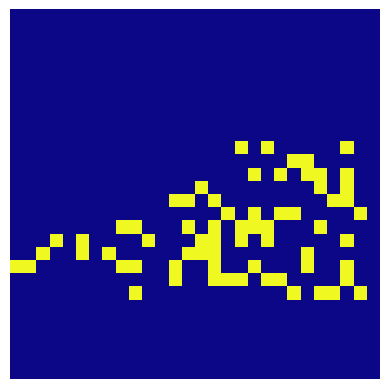

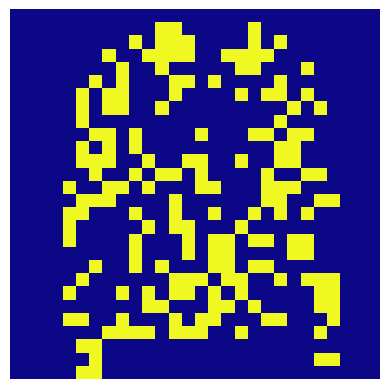

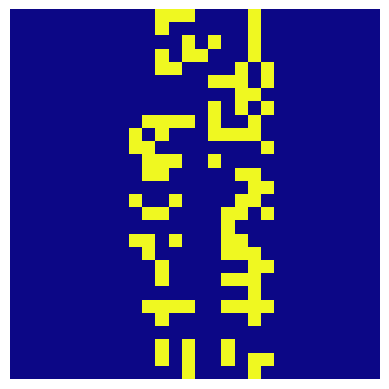

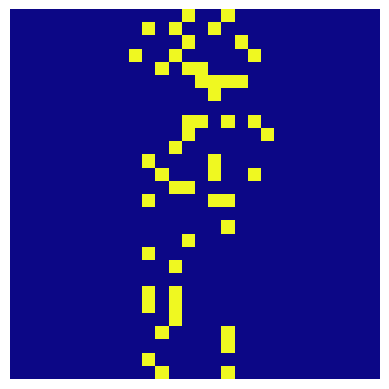

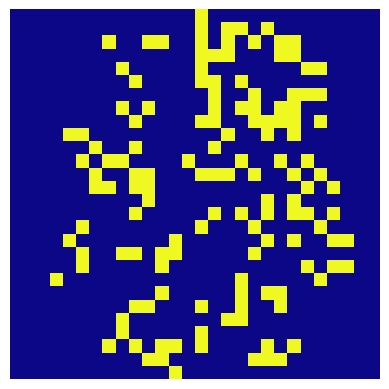

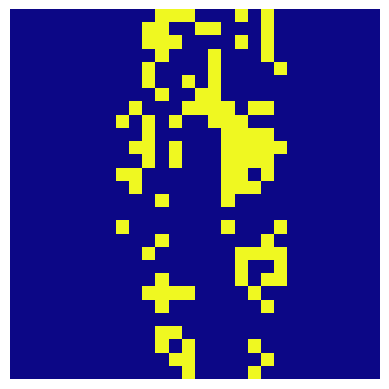

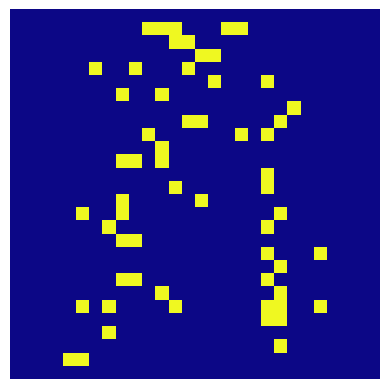

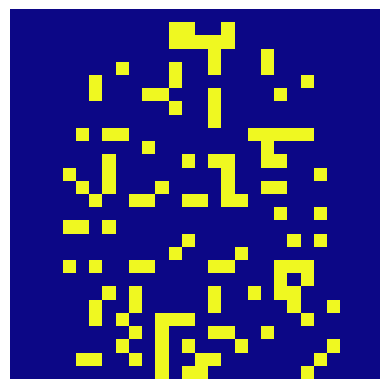

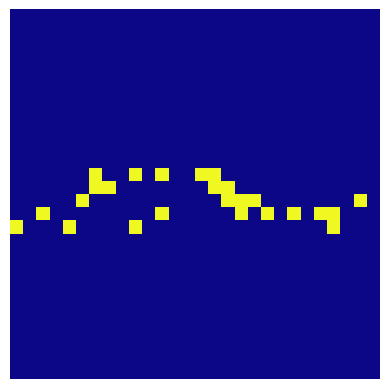

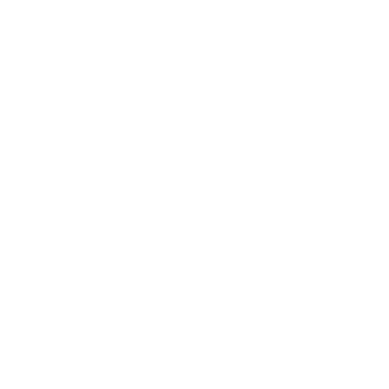

In [20]:
for i in range(0,10):
    image = dataset[i]
    image.cuda()
    print(target_label[target[i].item()])
    spike_data = spikegen.rate(image, num_steps=200, gain=.5)
    fig, ax = plt.subplots()
    anim = splt.animator(spike_data[:,0], fig, ax)
    anim.save(
        "../videos/rate-coding-video-FMNIST-{}.mp4".format(
           target_label[target[i].item()].lower().replace(' ', '-')
        )
    )
    display( HTML( anim.to_html5_video() ) )

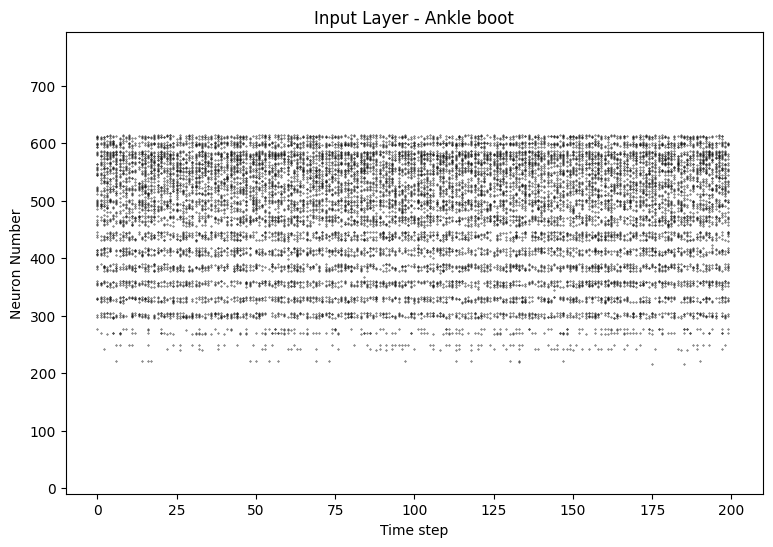

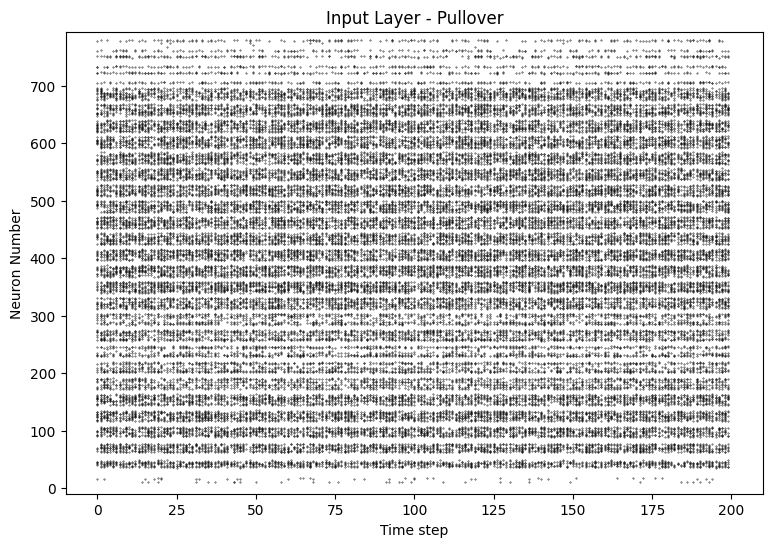

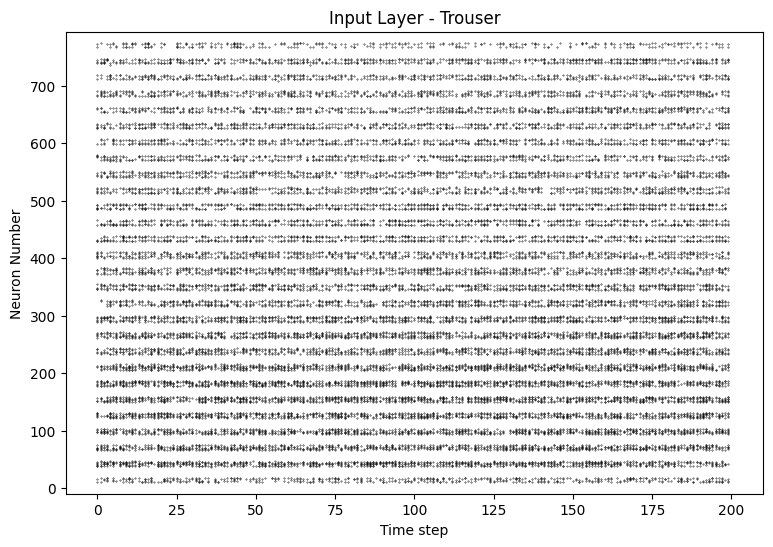

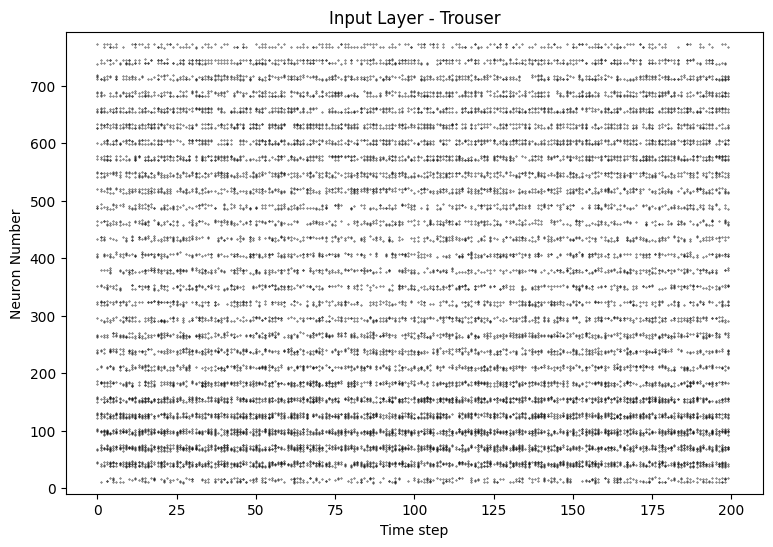

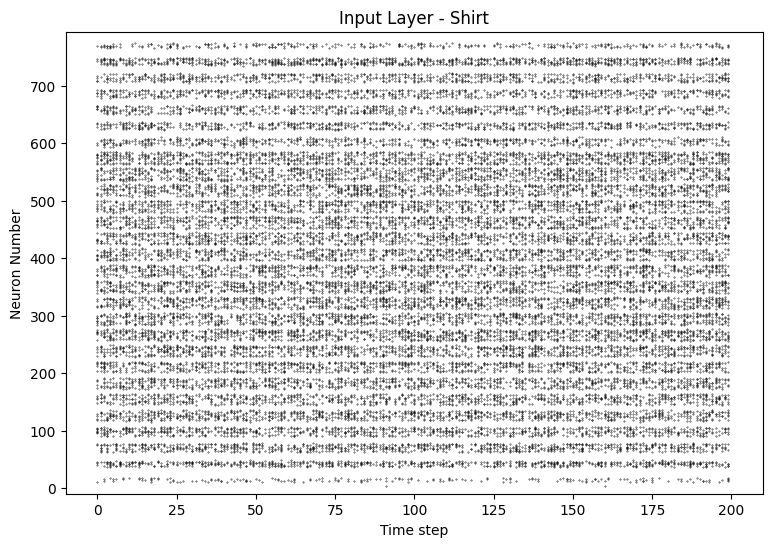

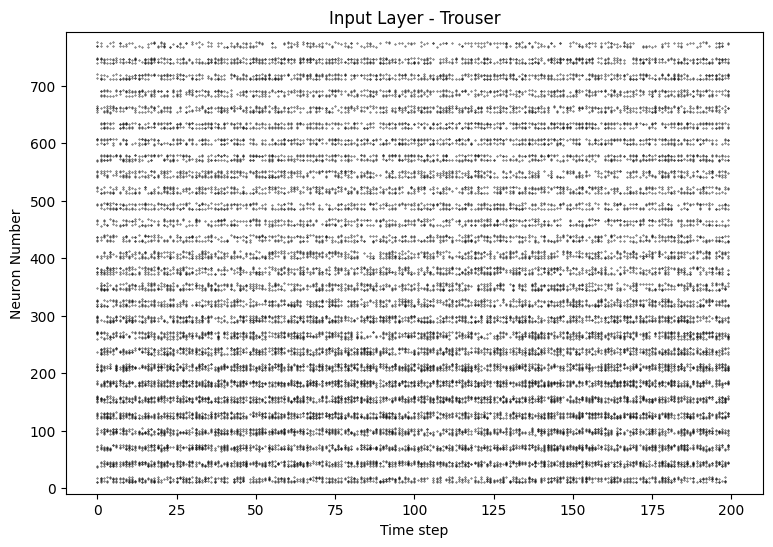

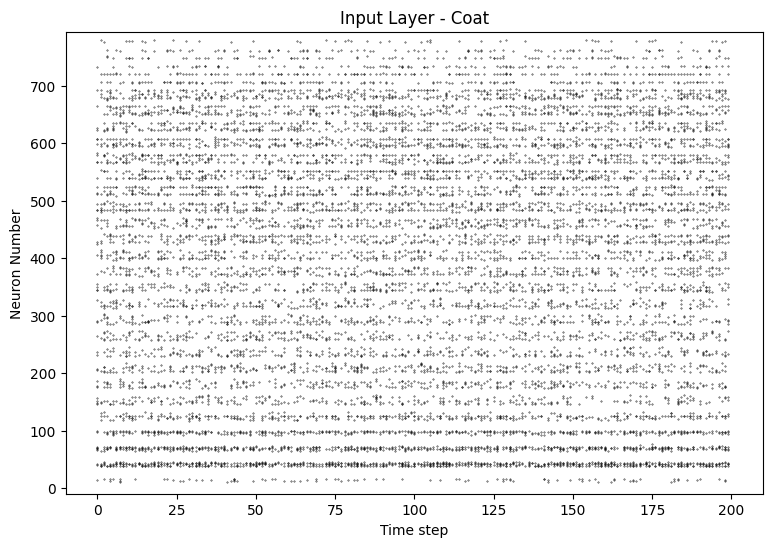

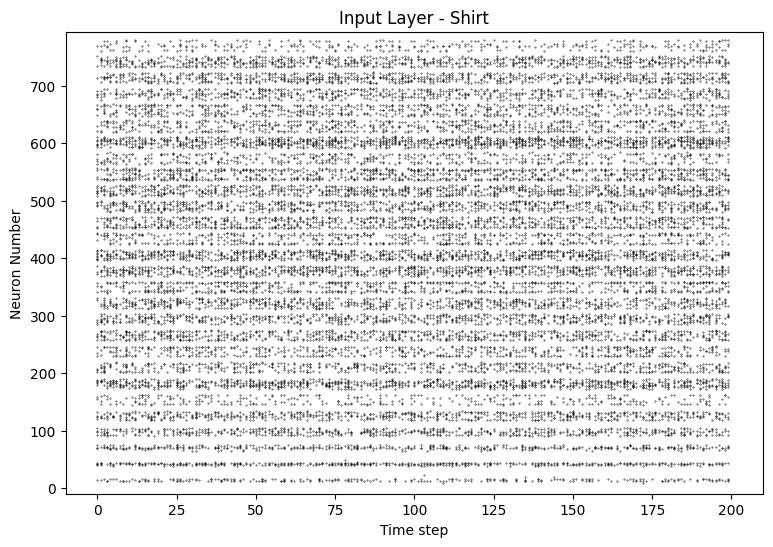

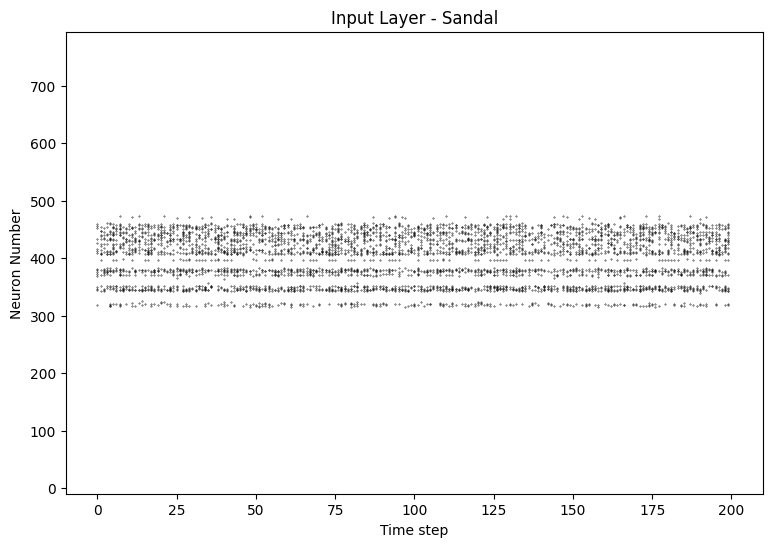

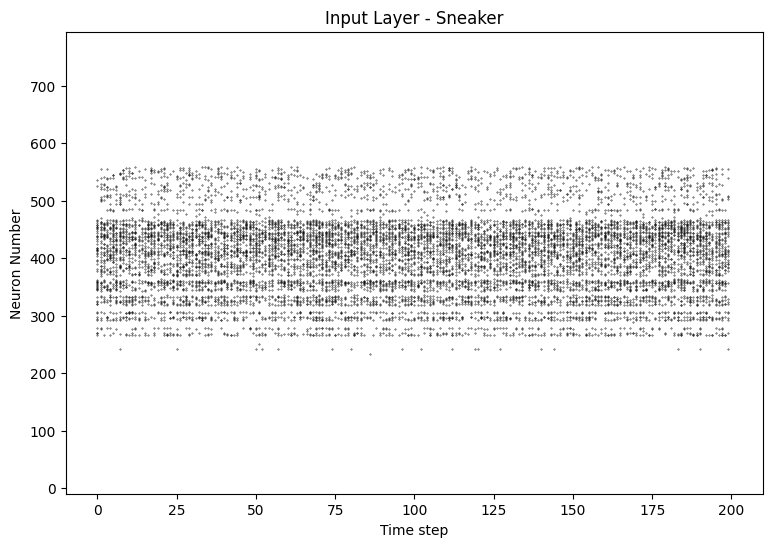

In [21]:
for i in range(0,10):
    image = dataset[i]
    image.cuda()
    spike_data = spikegen.rate(image, num_steps=200, gain=.5)
    fig = plt.figure(facecolor="w", figsize=(9, 6))
    ax = fig.subplots()
    ax.set_xlim((-10,210))
    ax.set_ylim((-10,794))
    splt.raster(spike_data.view(200,-1), ax, s=.1, c="black")

    plt.title("Input Layer - {}".format(target_label[target[i].item()]))
    plt.xlabel("Time step")
    plt.ylabel("Neuron Number")
    plt.savefig(
        "../figures/rate-coding-FMNIST-output-label-{}.eps".format(
            target_label[target[i].item()].lower().replace(' ', '-')
        ), format="eps")
    
    plt.savefig(
        "../figures/rate-coding-FMNIST-output-label-{}.png".format(
            target_label[target[i].item()].lower().replace(' ', '-')
        ), format="png")
    plt.show()

# Codifica Latency Coding
La codifica delle prime dieci immagini viene fatta con il metodo latency di snnTorch

In [22]:
import ipywidgets as widgets
from snntorch import spikegen
from matplotlib import pyplot as plt
from snntorch import spikeplot as splt
from IPython.display import HTML
from torch.utils.data import DataLoader

In [23]:
fmnist_test_loader = DataLoader(fmnist_testset, 10)
dataset, target = next(iter(fmnist_test_loader))

Ankle boot


Pullover


Trouser


Trouser


Shirt


Trouser


Coat


Shirt


Sandal


Sneaker


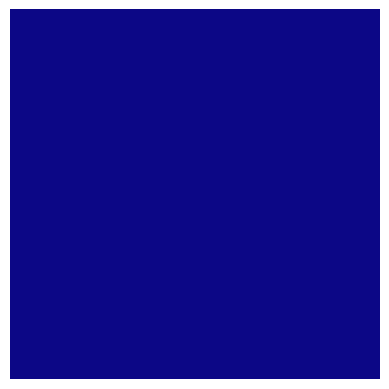

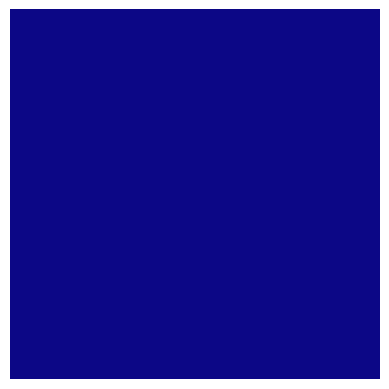

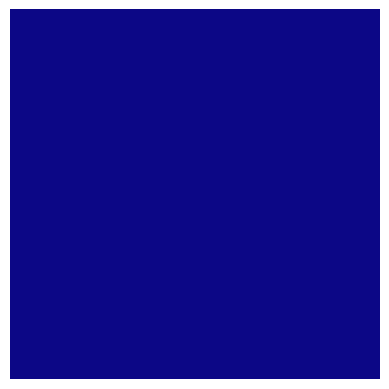

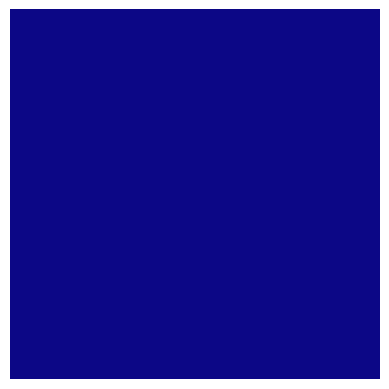

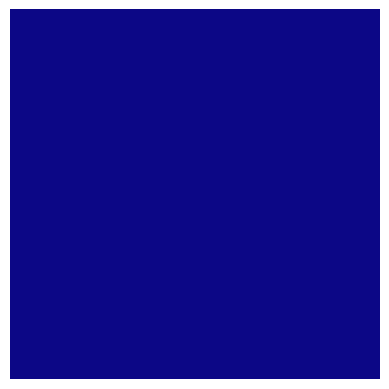

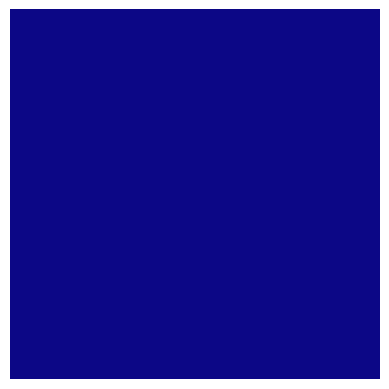

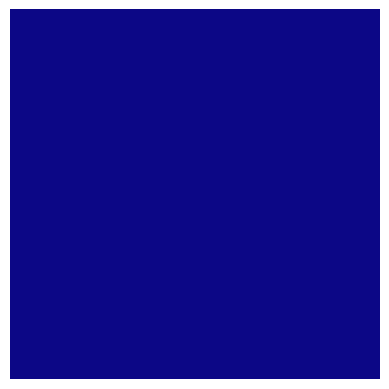

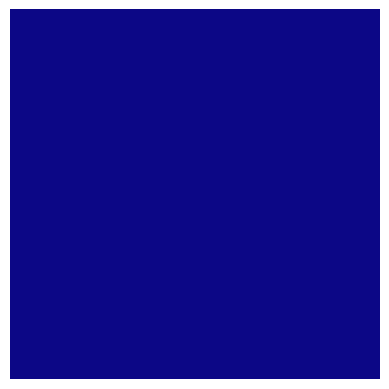

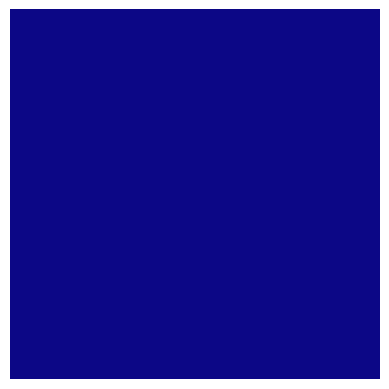

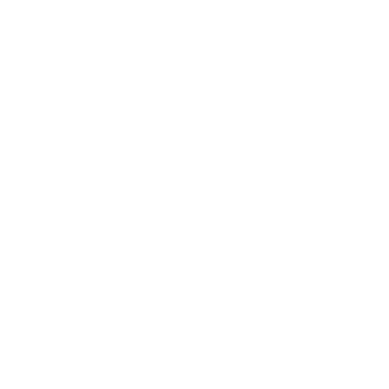

In [24]:
for i in range(0,10):
    image = dataset[i]
    image.cuda()
    print(target_label[target[i].item()])
    spike_data = spikegen.latency(image, num_steps=200, normalize=True, clip=True, linear=True)
    fig, ax = plt.subplots()
    anim = splt.animator(spike_data[:,0], fig, ax)
    anim.save(
        "../videos/latency-coding-video-FMNIST-{}.mp4".format(
        target_label[target[i].item()].lower().replace(' ','-')
        )
    )
    display( HTML( anim.to_html5_video() ) )

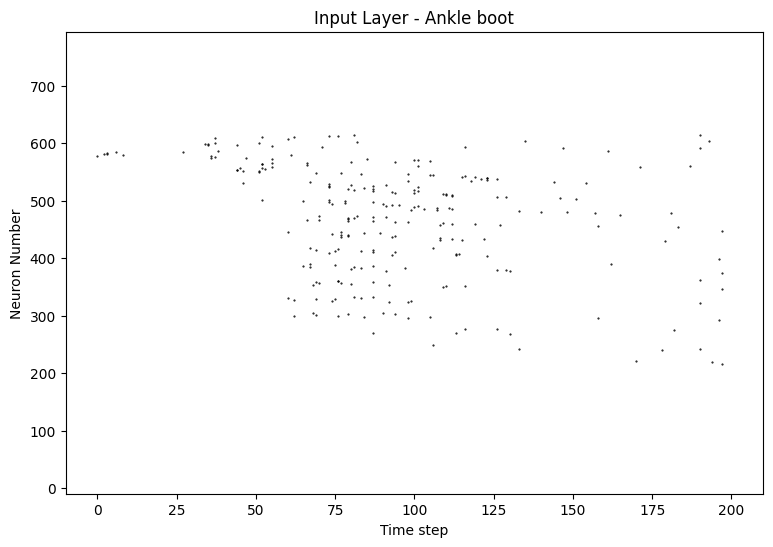

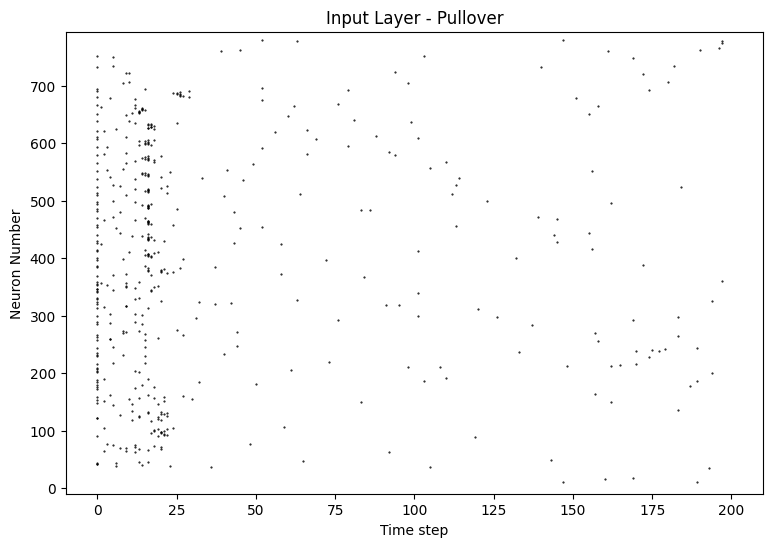

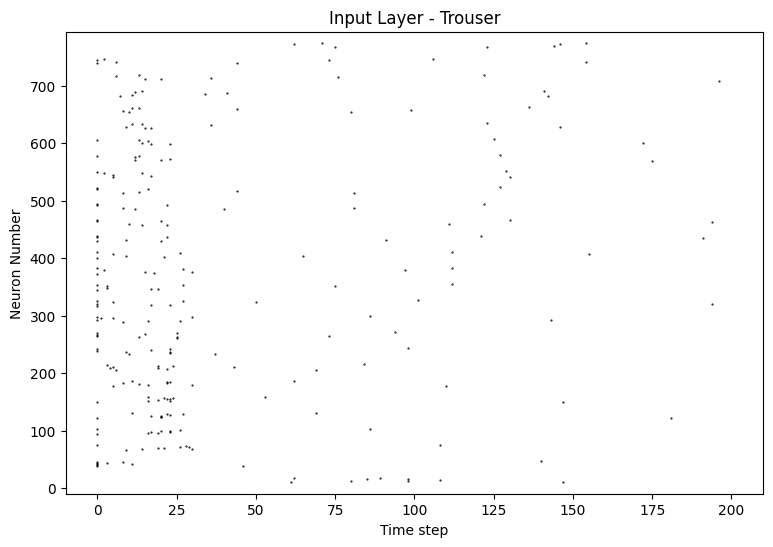

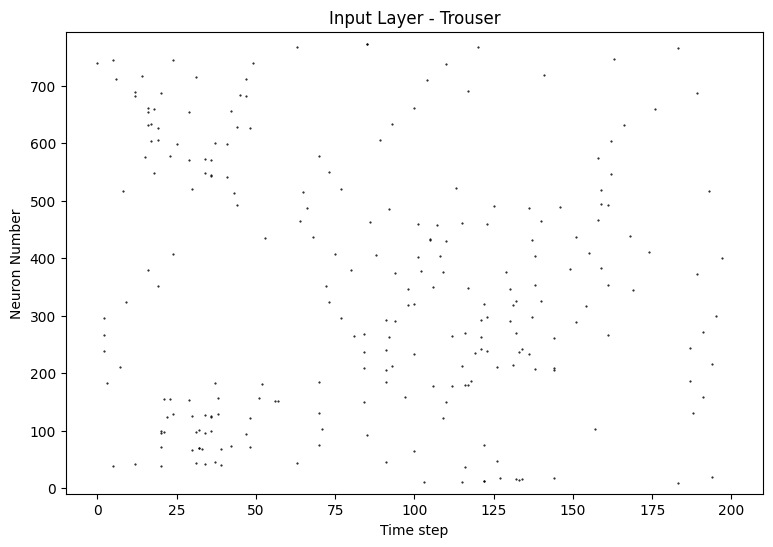

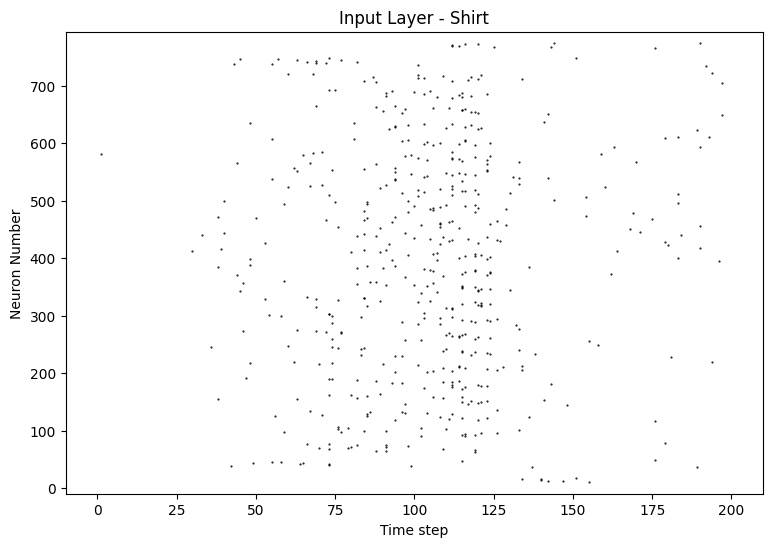

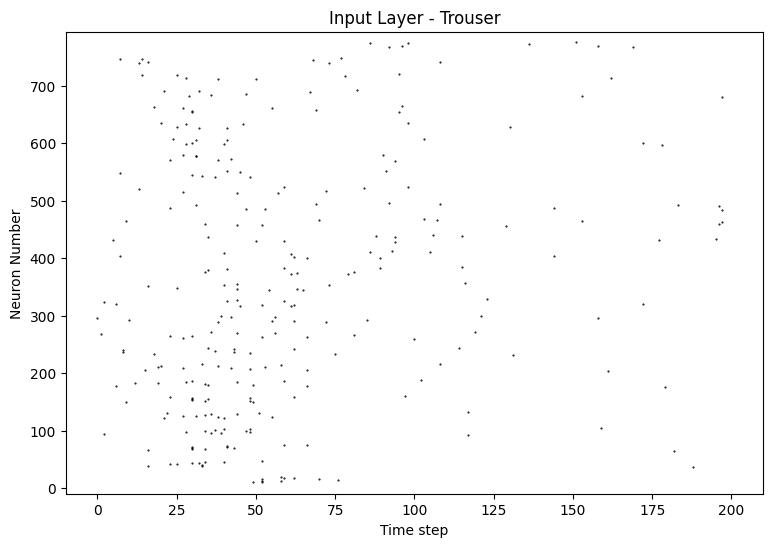

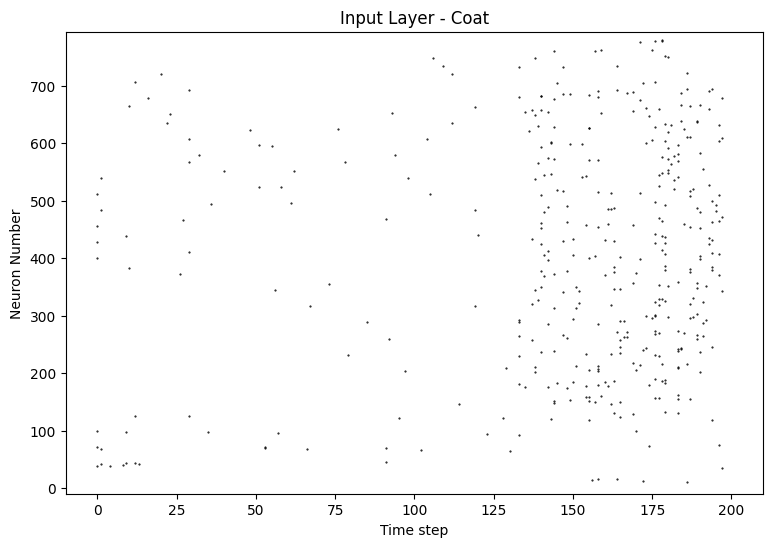

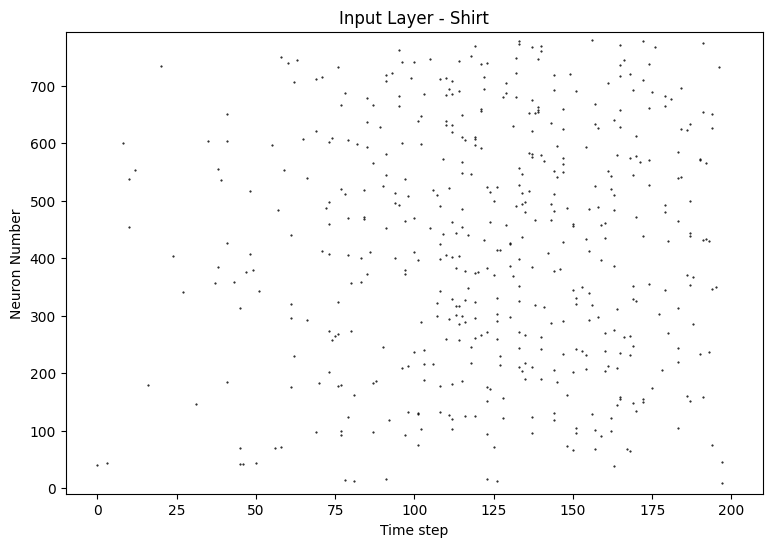

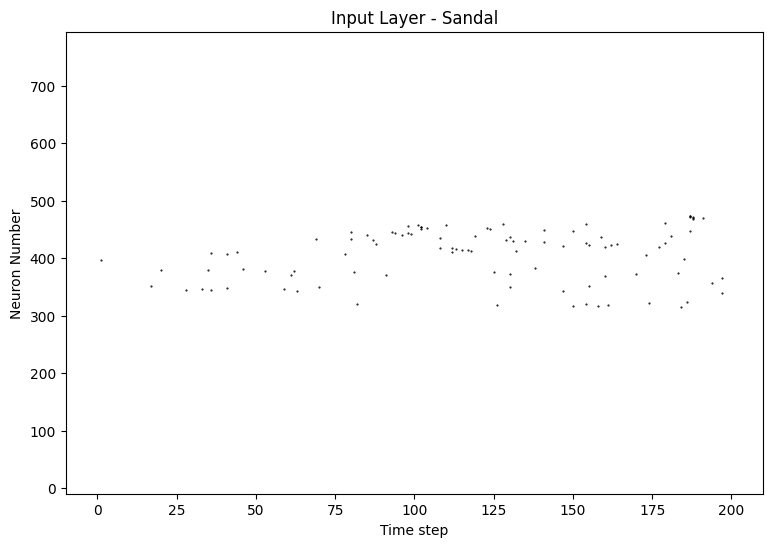

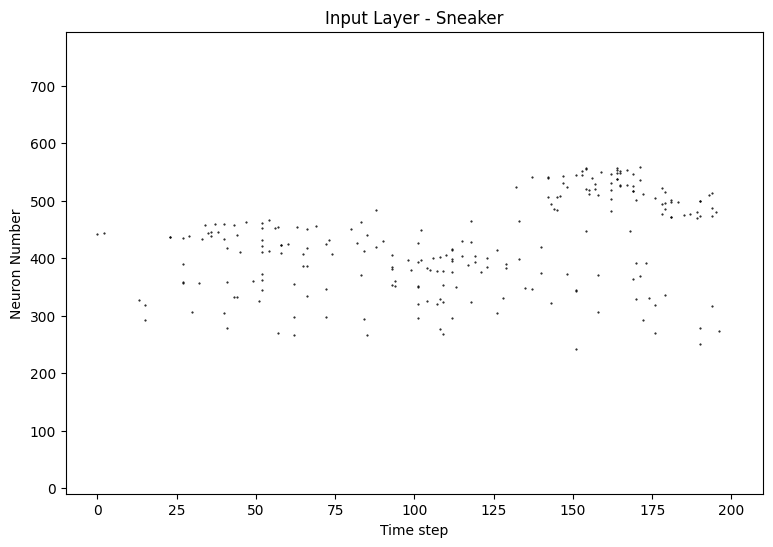

In [25]:
for i in range(0,10):
    image = dataset[i]
    image.cuda()
    spike_data = spikegen.latency(image, num_steps=200, normalize=True, clip=True, linear=True)
    fig = plt.figure(facecolor="w", figsize=(9, 6))
    ax = fig.subplots()
    ax.set_xlim((-10,210))
    ax.set_ylim((-10,794))
    splt.raster(spike_data.view(200,-1), ax, s=1, marker='.', c="black")

    plt.title("Input Layer - {}".format(target_label[target[i].item()]))
    plt.xlabel("Time step")
    plt.ylabel("Neuron Number")
    plt.savefig(
        "../figures/latency-coding-FMNIST-output-label-{}.eps".format(
            target_label[target[i].item()].lower().replace(' ','-')
        ), format="eps")
    
    plt.savefig(
        "../figures/latency-coding-FMNIST-output-label-{}.png".format(
            target_label[target[i].item()].lower().replace(' ','-')
        ), format="png")
    plt.show()